In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=600

In [93]:
data = pd.read_pickle("../Data/Prostate.pkl")

In [94]:
Target = data['Target'].values

In [95]:
data.drop('Target', axis=1, inplace = True)

In [96]:
AllTestPCA = PCA(n_components=580,random_state=42)
AllPCAresult = AllTestPCA.fit(data)
variance = np.cumsum(AllPCAresult.explained_variance_ratio_)
variance = np.insert(variance, 0, 0)

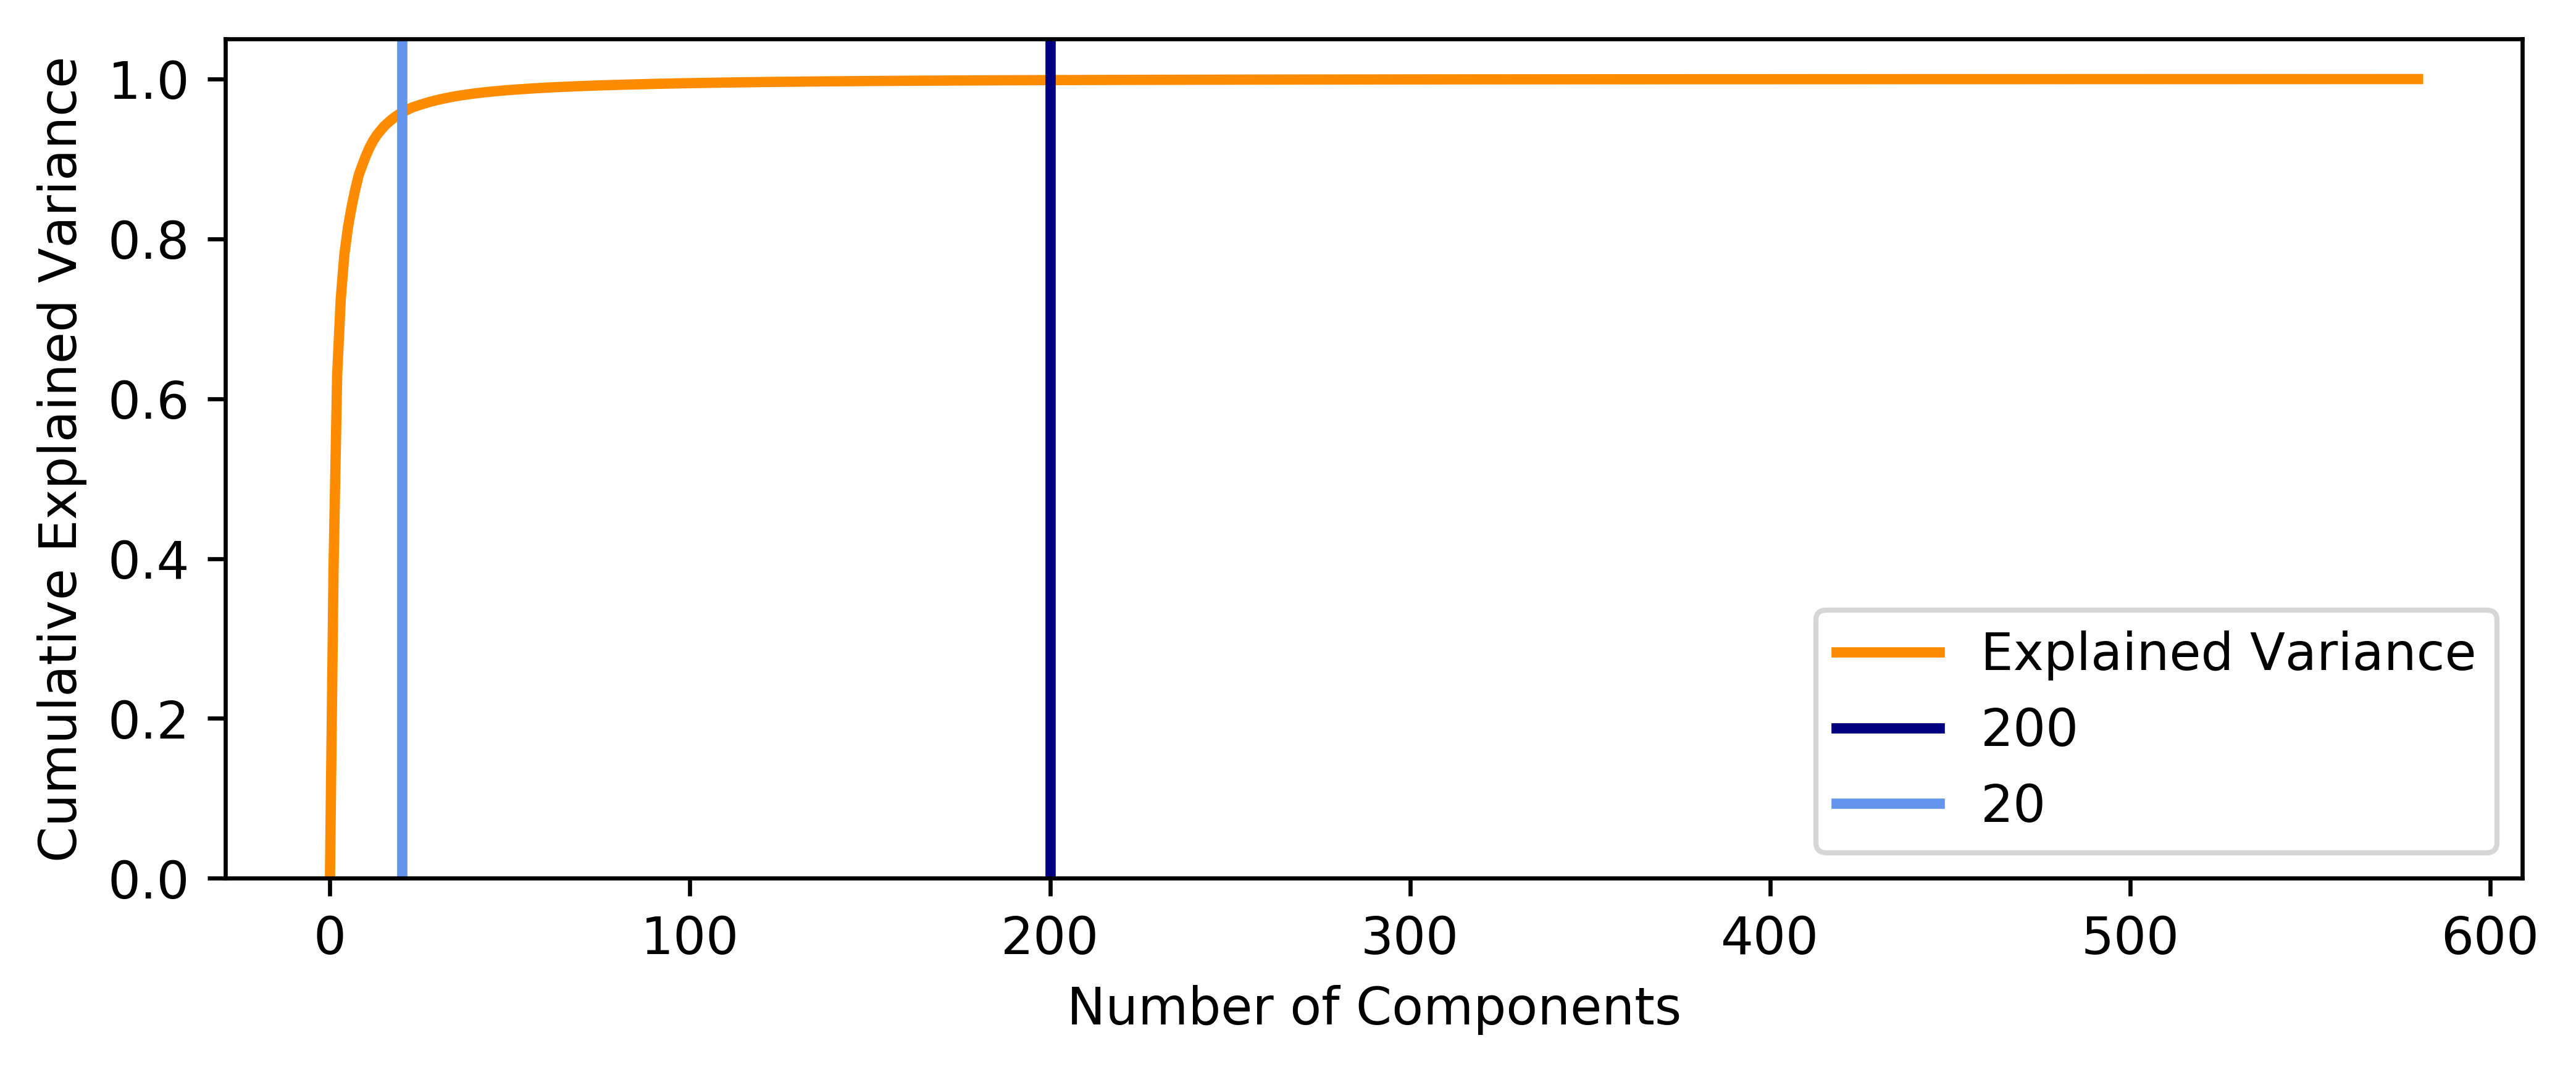

In [97]:
fig,ax = plt.subplots(figsize=(8,3))
ax.set_ylim([0,1.05])
plt.plot(variance, color='darkorange',
         lw=2, label='Explained Variance')
plt.xlabel('Number of Components')
plt.axvline(x=(200),c='navy', label="200", lw=2)
plt.axvline(x=(20),c='cornflowerblue', label="20", lw=2)
plt.ylabel('Cumulative Explained Variance');
plt.legend()

In [98]:
# In previous research 20 PCs expained 88.6% of variance
variance[20]

0.9581860442933996

In [99]:
PCA = PCA(n_components=20,random_state=42)
PCAfit = PCA.fit_transform(data)

In [100]:
PCAfit.shape

(580, 20)

# No SMOTE

In [101]:
X_train, X_test, y_train, y_test = train_test_split(PCAfit, Target, test_size=0.3, random_state=42)

In [102]:
cv = KFold(n_splits=5, shuffle=False, random_state=42)

In [103]:
linearModelCV = LogisticRegressionCV(cv=cv, max_iter=1000, solver = 'liblinear')

In [104]:
linearModelCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None,
           cv=KFold(n_splits=5, random_state=42, shuffle=False),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

ROC AUC:  0.9514266304347826
PR AUC:  0.9721501831337553
Accuracy:  0.9137931034482759
Precision:  0.9312977099236641
Recall:  0.953125
F1:  0.9420849420849421
False Negative:  0.034482758620689655
True Negative:  0.21264367816091953
False Positive:  0.05172413793103448
True Positive:  0.7011494252873564


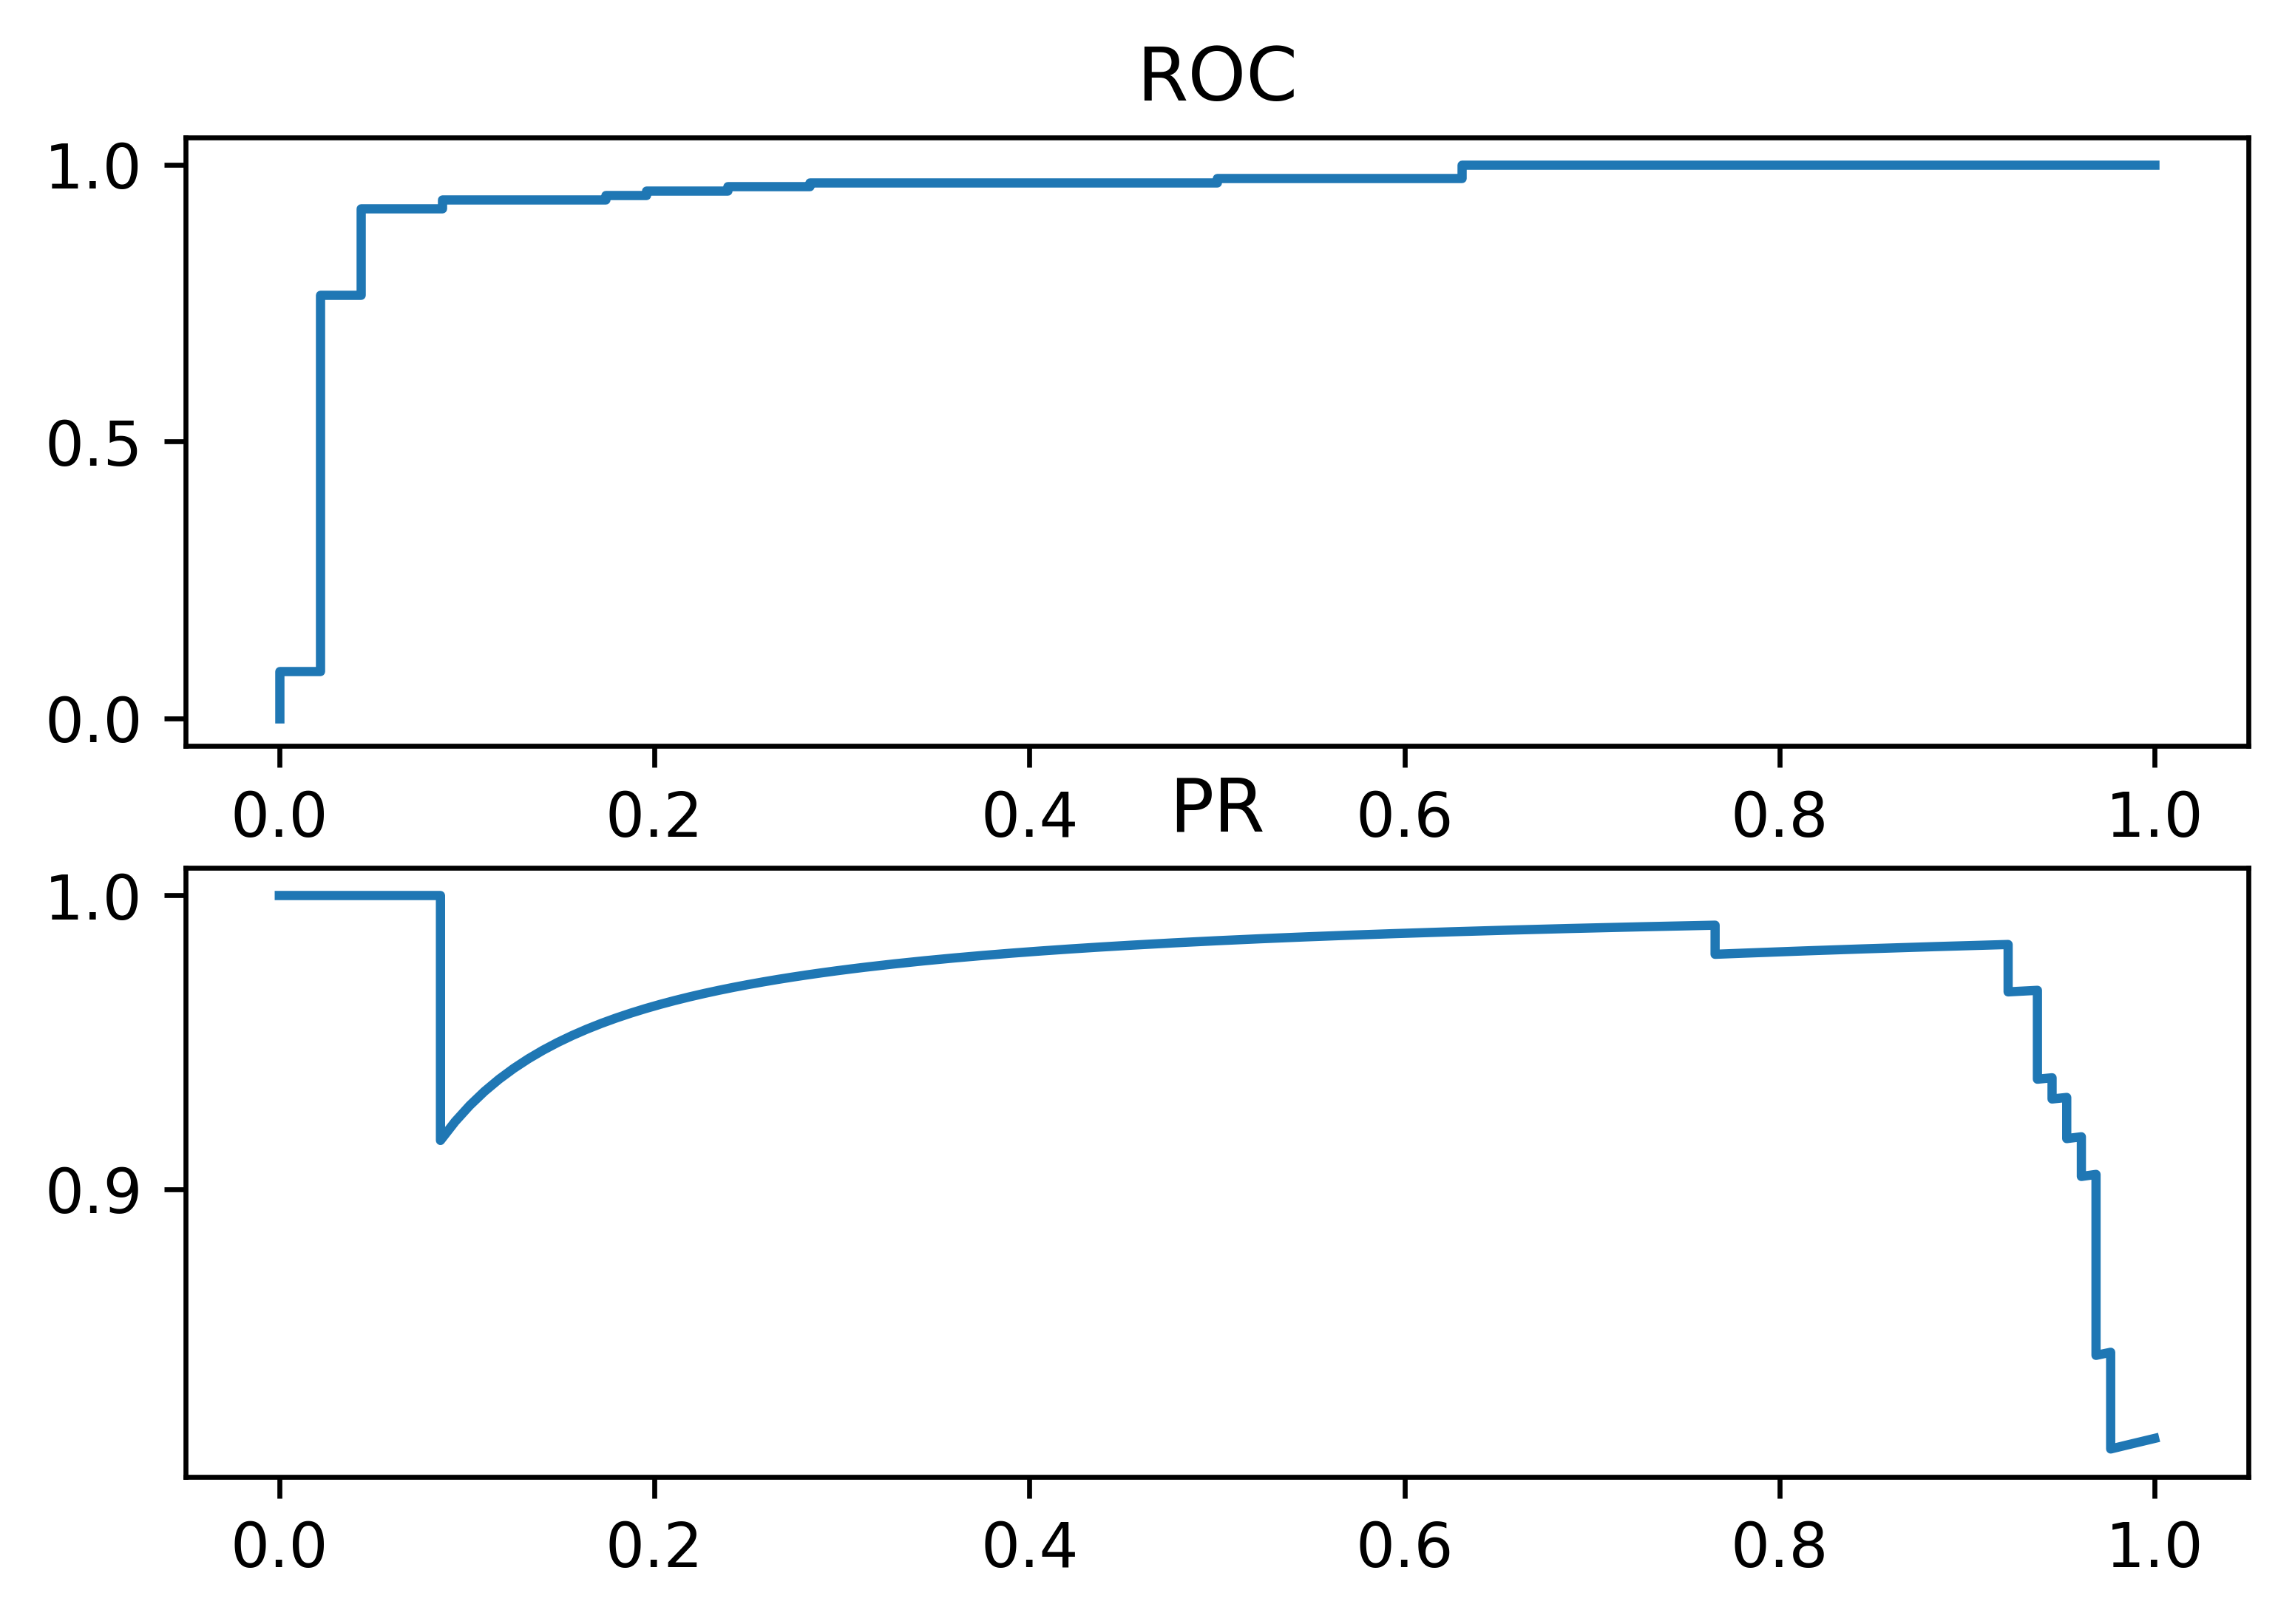

In [105]:
fig, axs = plt.subplots(nrows=2)
predsCV = linearModelCV.predict(X_test)
preds_proba = linearModelCV.predict_proba(X_test)
accuracy = (accuracy_score(y_test,predsCV))
precision = (precision_score(y_test,predsCV))
recall = (recall_score(y_test,predsCV))
f1 = (f1_score(y_test,predsCV))
ROCauc = (roc_auc_score(y_test,preds_proba[:,1]))
CM = (confusion_matrix(y_test,predsCV))/len(y_test)
FN=(CM[1][0])
TN=(CM[0][0])
FP=(CM[0][1])
TP=(CM[1][1])
axs[0].set_title("ROC")
axs[1].set_title("PR")
        
        
fprCV,tprCV,threshCV = roc_curve(y_test,preds_proba[:,1])
axs[0].plot(fprCV,tprCV)
precision_graph, recall_graph, _ = precision_recall_curve(y_test,preds_proba[:,1])
axs[1].plot(recall_graph,precision_graph)
PRauc=(metrics.auc(recall_graph,precision_graph))
plt.plot

print("ROC AUC: ", ROCauc)
print("PR AUC: ", PRauc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("False Negative: ", FN)
print("True Negative: ", TN)
print("False Positive: ", FP)
print("True Positive: ", TP)

Previous Research's Gene Results:

ROC AUC: 0.9127077785846848

PR AUC: 0.840970486084925

Accuracy: 0.8503703703703703

Precision: 0.7832512315270936

Recall: 0.7361111111111112

F1: 0.7589498806682579

False Negative: 0.08444444444444445

True Negative: 0.6148148148148148

False Positive: 0.06518518518518518

True Positive: 0.23555555555555555

# With SMOTE

In [106]:
smAll = SMOTE(random_state=42, sampling_strategy={0:3000,1:1500})
X_res, y_res = smAll.fit_resample(PCAfit, Target)

/Users/martincasey/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (3000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 426)
  n_samples_majority))
/Users/martincasey/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (1500) in class 1 will be larger than the number of samples in the majority class (class #1 -> 426)
  n_samples_majority))


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [108]:
cv = KFold(n_splits=5, shuffle=False, random_state=42)

In [109]:
linearModelCV = LogisticRegressionCV(cv=cv, max_iter=1000, solver = 'liblinear')

In [110]:
linearModelCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None,
           cv=KFold(n_splits=5, random_state=42, shuffle=False),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

ROC AUC:  0.9843595557881273
PR AUC:  0.9811418119800163
Accuracy:  0.9607407407407408
Precision:  0.9726651480637813
Recall:  0.9123931623931624
F1:  0.9415656008820288
False Negative:  0.03037037037037037
True Negative:  0.6444444444444445
False Positive:  0.008888888888888889
True Positive:  0.3162962962962963


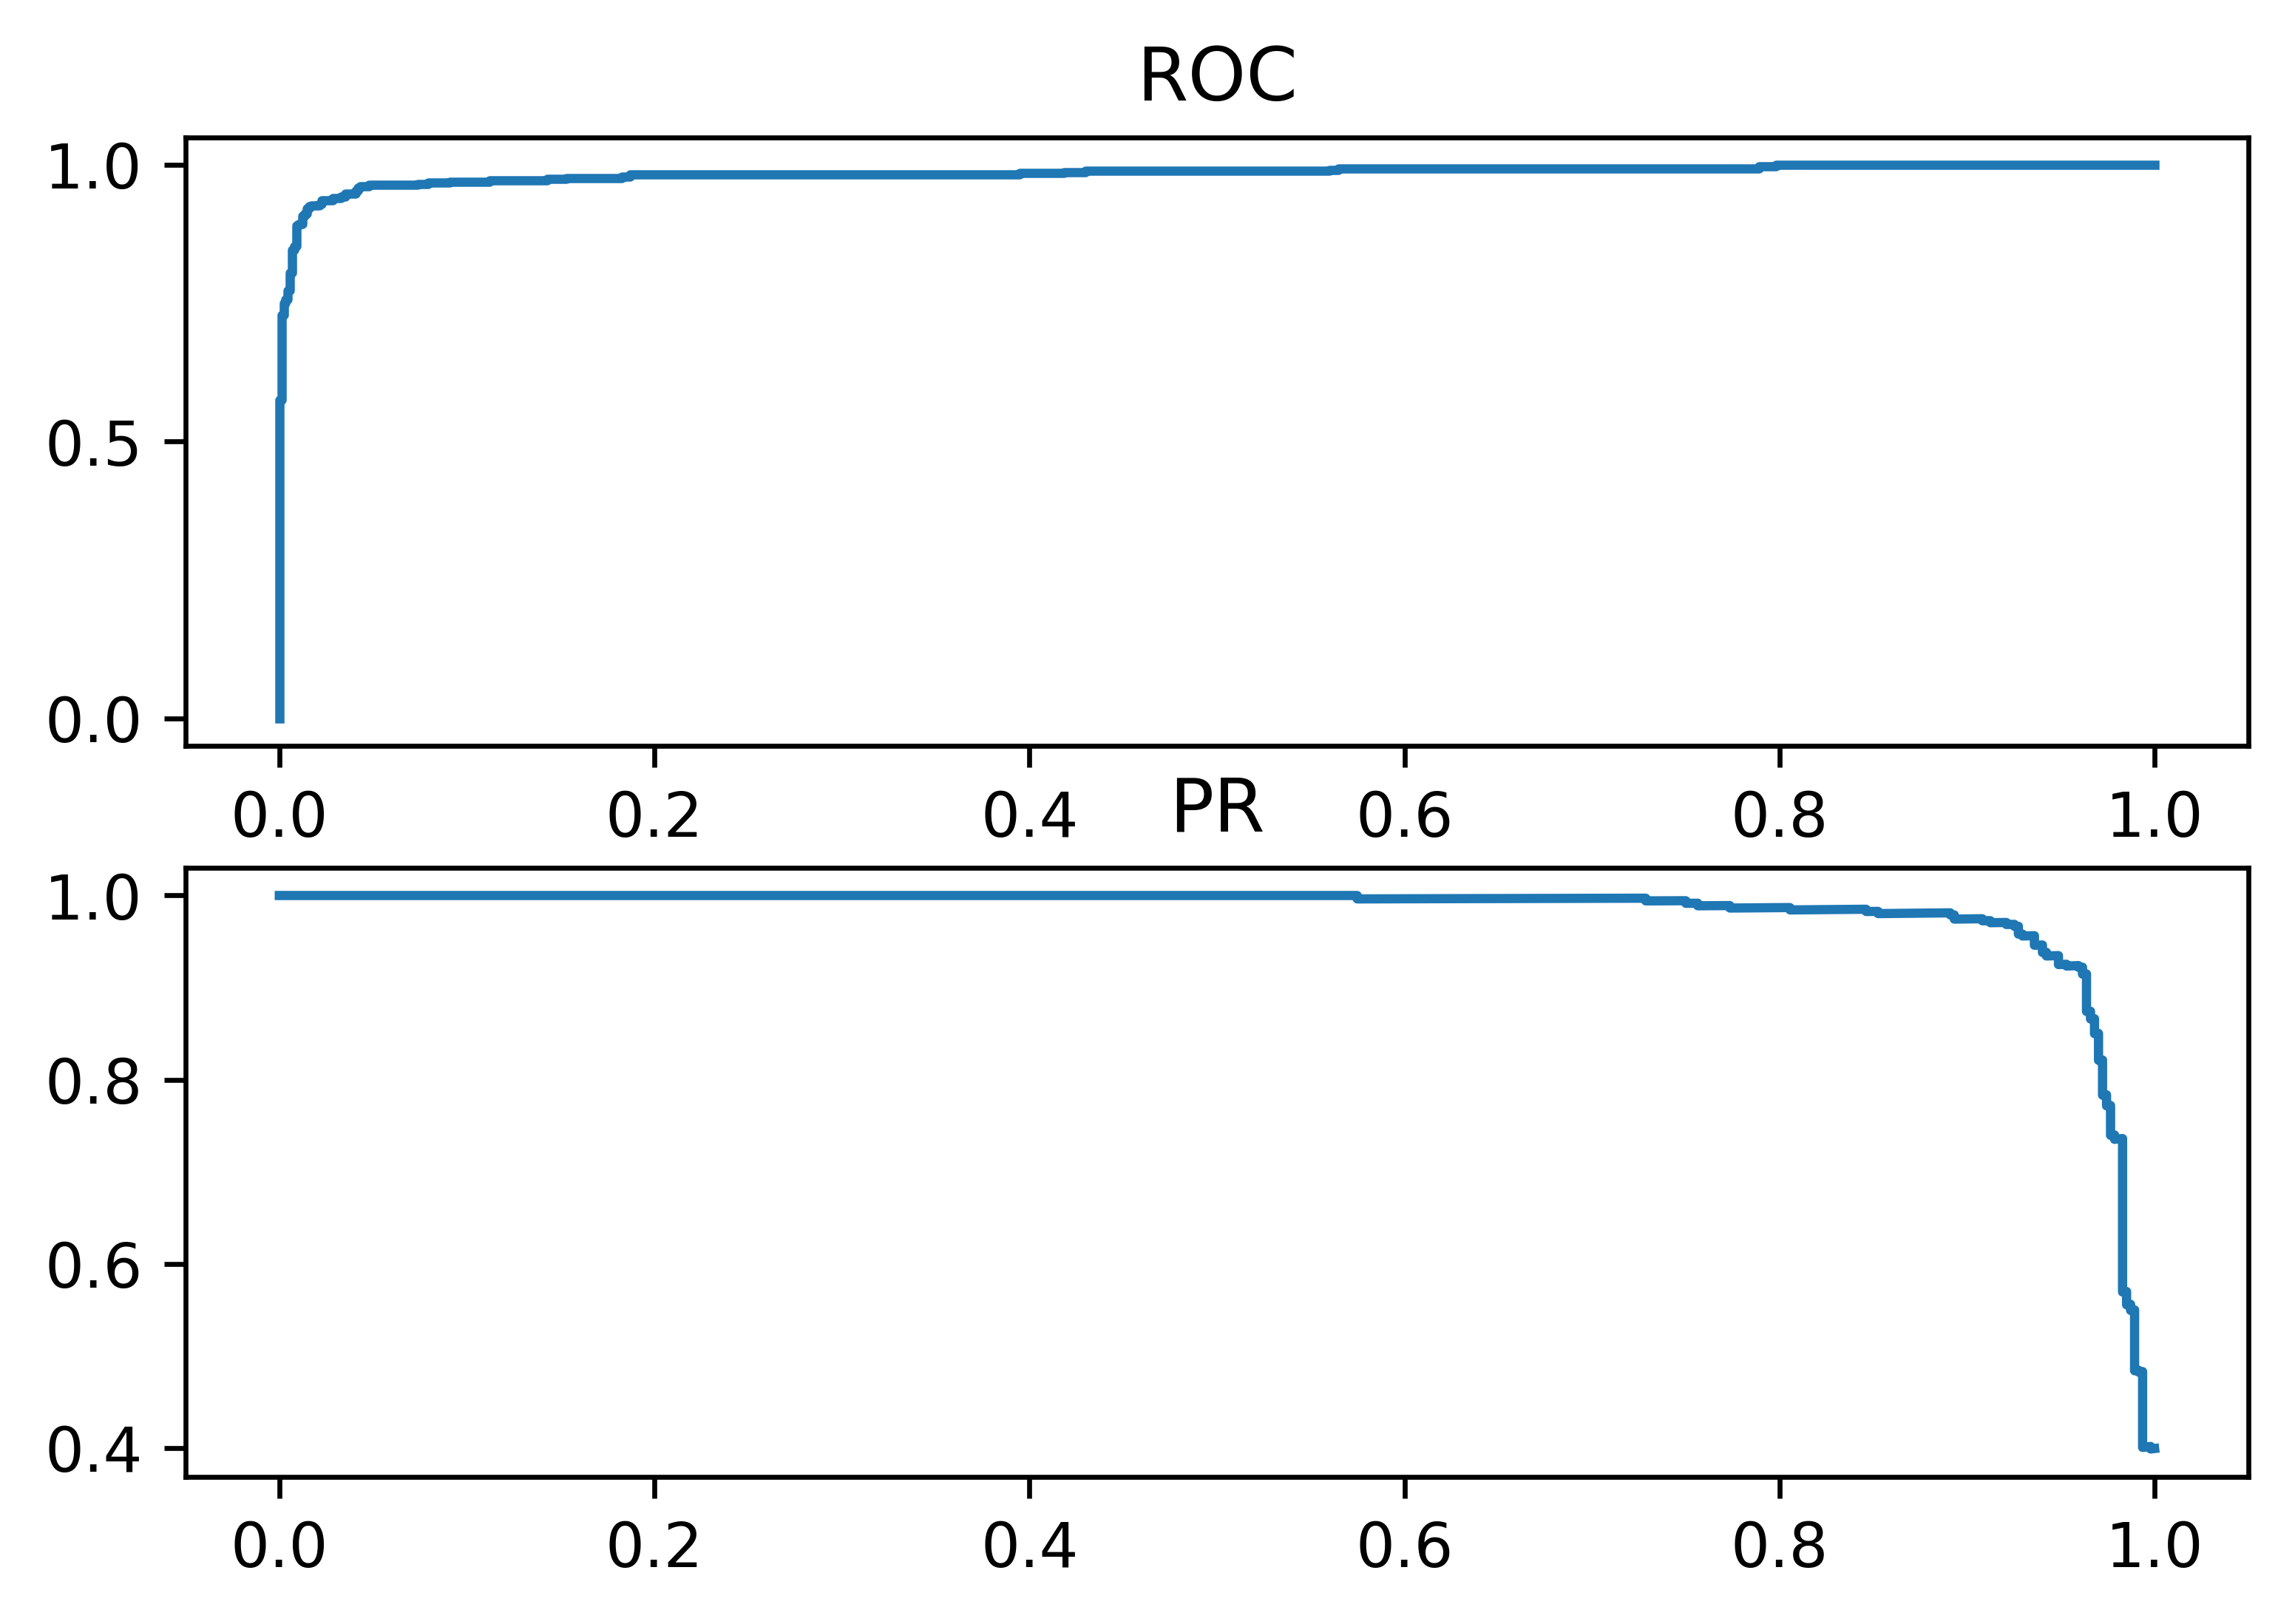

In [111]:
fig, axs = plt.subplots(nrows=2)
predsCV = linearModelCV.predict(X_test)
preds_proba = linearModelCV.predict_proba(X_test)
accuracy = (accuracy_score(y_test,predsCV))
precision = (precision_score(y_test,predsCV))
recall = (recall_score(y_test,predsCV))
f1 = (f1_score(y_test,predsCV))
ROCauc = (roc_auc_score(y_test,preds_proba[:,1]))
CM = (confusion_matrix(y_test,predsCV))/len(y_test)
FN=(CM[1][0])
TN=(CM[0][0])
FP=(CM[0][1])
TP=(CM[1][1])
axs[0].set_title("ROC")
axs[1].set_title("PR")
        
        
fprCV,tprCV,threshCV = roc_curve(y_test,preds_proba[:,1])
axs[0].plot(fprCV,tprCV)
precision_graph, recall_graph, _ = precision_recall_curve(y_test,preds_proba[:,1])
axs[1].plot(recall_graph,precision_graph)
PRauc=(metrics.auc(recall_graph,precision_graph))
plt.plot

print("ROC AUC: ", ROCauc)
print("PR AUC: ", PRauc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
print("False Negative: ", FN)
print("True Negative: ", TN)
print("False Positive: ", FP)
print("True Positive: ", TP)

Previous Research's Gene Results:

ROC AUC:  0.9127077785846848 

PR AUC:  0.840970486084925 

Accuracy:  0.8503703703703703

Precision:  0.7832512315270936

Recall:  0.7361111111111112

F1:  0.7589498806682579

False Negative:  0.08444444444444445

True Negative:  0.6148148148148148

False Positive:  0.06518518518518518

True Positive:  0.23555555555555555